In [2]:
stmts = pklload('../data/bioexp_asmb_preassembled.pkl')

In [3]:
evs_sorted = sorted([len(s.evidence) for s in stmts], reverse=True)

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib notebook

In [6]:
statements_by_mention = defaultdict(int)
for ev in evs_sorted:
    statements_by_mention[ev] += 1

## Raw distribution plot

<IPython.core.display.Javascript object>


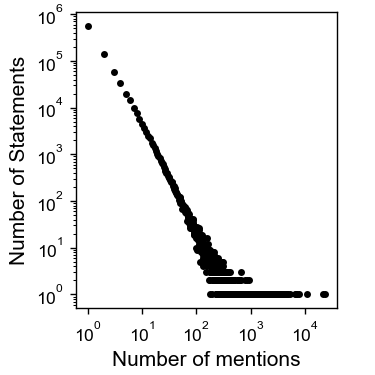

In [7]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['text.usetex'] = False
items = sorted(statements_by_mention.items(), key=lambda x: x[0])
plt.figure(figsize=(3, 3))
plt.plot([i[0] for i in items], [i[1] for i in items], 'ko', markersize=3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Statements', fontsize=12)
plt.xlabel('Number of mentions', fontsize=12)
ax = plt.gca()
ax.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4])
plt.subplots_adjust(left=0.202, bottom=0.179, right=0.898, top=0.967)

In [22]:
plt.savefig('fig2_evidence_distribution.pdf')

## Logarithmic binning
See https://www.hpl.hp.com/research/idl/papers/webmarkets/webmarkets.pdf

In [8]:
import numpy
bins = numpy.logspace(0, 5, 16)
bins

array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05])

In [9]:
binned_items = defaultdict(int)
for x, y in items:
    for bin in bins:
        if x <= bin:
            binned_items[bin] += y
            break
binned_items

defaultdict(int,
            {1.0: 565396,
             2.154434690031884: 142716,
             4.641588833612778: 92577,
             10.0: 61939,
             21.544346900318832: 20083,
             46.41588833612777: 7945,
             100.0: 2740,
             215.44346900318823: 1007,
             464.15888336127773: 341,
             1000.0: 113,
             2154.4346900318824: 47,
             4641.588833612777: 25,
             10000.0: 7,
             21544.346900318822: 2,
             46415.888336127726: 1})

In [10]:
total = sum(binned_items.values())
normalized_binned_items = {k: v/total for k, v in binned_items.items()}

In [11]:
from scipy.stats import linregress
x = list(normalized_binned_items.keys())
y = list(normalized_binned_items.values())
res = linregress(numpy.log10(x), numpy.log10(y))
yp = [10**(res.intercept + numpy.log10(xx)*res.slope) for xx in x]

<IPython.core.display.Javascript object>


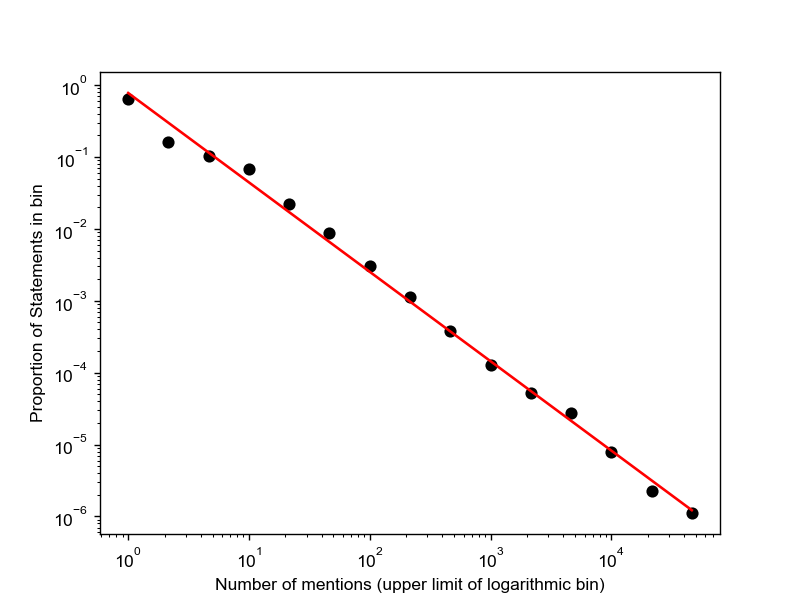

Text(0.5, 0, 'Number of mentions (upper limit of logarithmic bin)')

In [12]:
plt.figure()
plt.plot(x, y, 'ko')
plt.plot(x, yp, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Proportion of Statements in bin')
plt.xlabel('Number of mentions (upper limit of logarithmic bin)')

In [28]:
res

LinregressResult(slope=-1.2435157121460503, intercept=-0.10952384353194189, rvalue=-0.9978575727146102, pvalue=8.749652483376486e-17, stderr=0.022612383941020494, intercept_stderr=0.06200296923048739)

In [13]:
res.rvalue**2

0.9957197354238936

## CCDF
See https://doi.org/10.1137/070710111


In [14]:
import numpy
bins = numpy.logspace(0, 5, 16)
bins

array([1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04, 2.15443469e+04, 4.64158883e+04, 1.00000000e+05])

In [15]:
binned_items = defaultdict(int)
for x, y in items:
    for bin in bins:
        if x >= bin:
            binned_items[bin] += y
binned_items

defaultdict(int,
            {1.0: 894939,
             2.154434690031884: 186827,
             4.641588833612778: 94250,
             10.0: 36821,
             21.544346900318832: 12228,
             46.41588833612777: 4283,
             100.0: 1563,
             215.44346900318823: 536,
             464.15888336127773: 195,
             1000.0: 83,
             2154.4346900318824: 35,
             4641.588833612777: 10,
             10000.0: 3,
             21544.346900318822: 1})

In [16]:
total = len(evs_sorted)
normalized_binned_items = {k: v/total for k, v in binned_items.items()}
from scipy.stats import linregress
x = list(normalized_binned_items.keys())
y = list(normalized_binned_items.values())
res = linregress(numpy.log10(x), numpy.log10(y))
yp = [10**(res.intercept + numpy.log10(xx)*res.slope) for xx in x]
res

LinregressResult(slope=-1.334273822800124, intercept=-0.08685686918183722, rvalue=-0.999319217097204, pvalue=1.4351926341443953e-18, stderr=0.014219865674549118, intercept_stderr=0.036253686277597084)

<IPython.core.display.Javascript object>


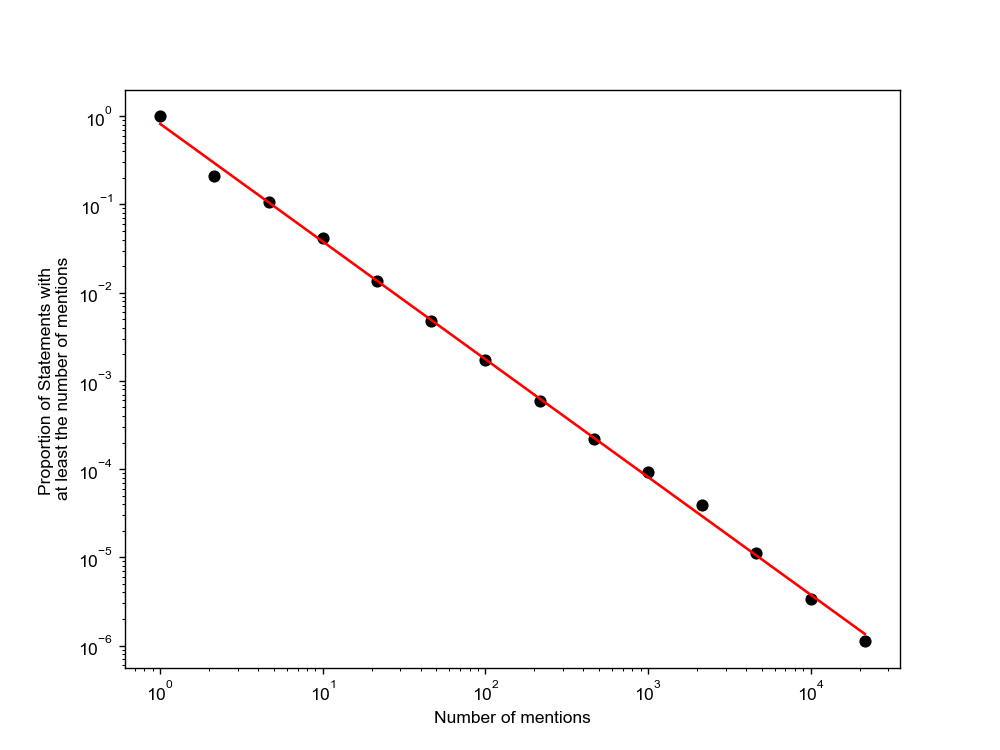

Text(0.5, 0, 'Number of mentions')

In [17]:
x = list(normalized_binned_items.keys())
y = list(normalized_binned_items.values())
plt.figure()
plt.plot(x, y, 'ko')
plt.plot(x, yp, 'r-')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Proportion of Statements with \nat least the number of mentions')
plt.xlabel('Number of mentions')

In [18]:
res.rvalue**2

0.9986388976597687

## Powerlaw package

In [19]:
import powerlaw

In [20]:
results = powerlaw.Fit(evs_sorted, discrete=True)

Calculating best minimal value for power law fit


In [21]:
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
results.supported_distributions

2.3530175918499303
12.0
0.007992739507567128


{'power_law': powerlaw.Power_Law,
 'lognormal': powerlaw.Lognormal,
 'exponential': powerlaw.Exponential,
 'truncated_power_law': powerlaw.Truncated_Power_Law,
 'stretched_exponential': powerlaw.Stretched_Exponential,
 'lognormal_positive': powerlaw.Lognormal_Positive}

In [22]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


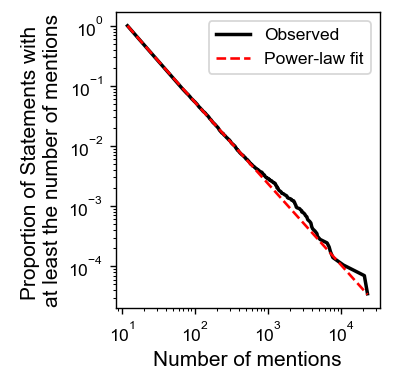

In [34]:
plt.figure(figsize=(3.3,3))
fig = results.plot_ccdf(color='k', linewidth=2, label='Observed')
results.power_law.plot_ccdf(color='r', linestyle='--', ax=fig, label='Power-law fit')
plt.ylabel('Proportion of Statements with \nat least the number of mentions', fontsize=12)
plt.xlabel('Number of mentions', fontsize=12)
ax = plt.gca()
ax.set_xticks([1e1, 1e2, 1e3, 1e4])
plt.subplots_adjust(left=0.28, bottom=0.179, right=0.92, top=0.967)
plt.legend()
plt.savefig('fig2_power_law.pdf')

In [56]:
results.distribution_compare('power_law', 'lognormal_positive')

(386.30512070711495, 5.686168731907637e-31)

In [15]:
results.alpha, results.sigma, results.xmin

(2.3530175918499303, 0.007992739507567128, 12.0)